# 4 - Influential Classification Models (and Tools)

## Introduction

This project will dive into more advanced developments of Convolutional Neural Networks (CNNs) that has become famous for their contributions to computer visions. The notebook will also explore methods that better prepare the CNNs to perform on specific tasks, such as the use of Transfer Learning whereby previous knowledge (trained weights) of a network on a specific use case can be transferred/re-develope for new applications. 

## Breakdown of this Notebook:
- Advance architectures of CNN like, VGG, Inception and ResNet.
- Implementations of these advance network for classification tasks.
- Transfer Learning for efficient repurposing of trained networks.

## Requirements:
- Tensorflow 2.0 (GPU is better)
- Tensorflow-Hub

### Import the required libraries:

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import timeit

In [2]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt

# %matplotlib inline

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

In [3]:
# Set the random set seed number: for reproducibility.
Seed_nb = 42

### GPU Information:

In [4]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
devices = sess.list_devices()
devices

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5



[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 16872007662967207059),
 _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 6588305899, 5316556418841401600)]

## 1 - Advanced CNN Architectures:

Advancements in recent years have pushed the capabilities of CNNs, winning models have been featured in contest such as the __ImageNet Large Scale Visual Recognition Challenge (ILSVRC)__. This contest consists of millions of images that are split up into __1,000__ classes and still represent a great challenge for researchers. In 2012, AlexNet had won the competeition. This section will then go through methods or architectures, and the model's contributions that were developed after the winning AlexNet. 

## 1.1 - Contributions from AlexNet:

AlexNet was known to be the first CNN that had successfully trained on the complex ILSVRC dataset for image recognition. The implementations of AlexNet lead to several contributions that are highly useful for CNNs. These contributions includes:

- Use of Rectified Linear Unit (ReLU) as an activation function. This had solved the vanishing gradient problem therefore improving the training process.
- The use of Dropout for CNNs. Essentially, it amounts to sampling a thinned-out network and is used as a regularisation technique.
- Application of different types of transformations to augment the dataset. These techniques can be image translation, horizontal fliipping, or cropping etc.
- Solidifying the typical archittecture of a CNN, such as combining convolutions with pooling layers and with the use of dense layers in latter stages for the final prediction.

The following will continue discussing the more advanced networks.

### List of Advanced Networks:
1) VGG, Visual Geometry Group. \
2) Inception. \
3) ResNet.

## 1.2 - VGG Architecture:

The VGG network was developed by the Visual Geometry Group at Oxford University. Thiis network was able to achieve 2nd place during the ILSVRC of 2014. This section will go through the architecture of VGG and how it was able to obtain a higher accuracy score while training on fewer parameters. The main motivatiion for VGG was to try and __go deeper__ as a network where it consists of building such a network with a larger number of stacked layers. The drawback from doing it this way is that the number of parameters also increased. This meant that it will take longer to train the model. When VGG was submitted into ILSVRC of 2014, they achieved the top-5 error of 7.3%, performing better than AlexNet which got a 16.4% error. 

NOTE: __Top-5 Accuracy__ is one of the main classification metrics of the contest, where it considers if the correct class prediction is amongst the five first guesses. 

#### The diagram below shows the overall architecures of VGG:

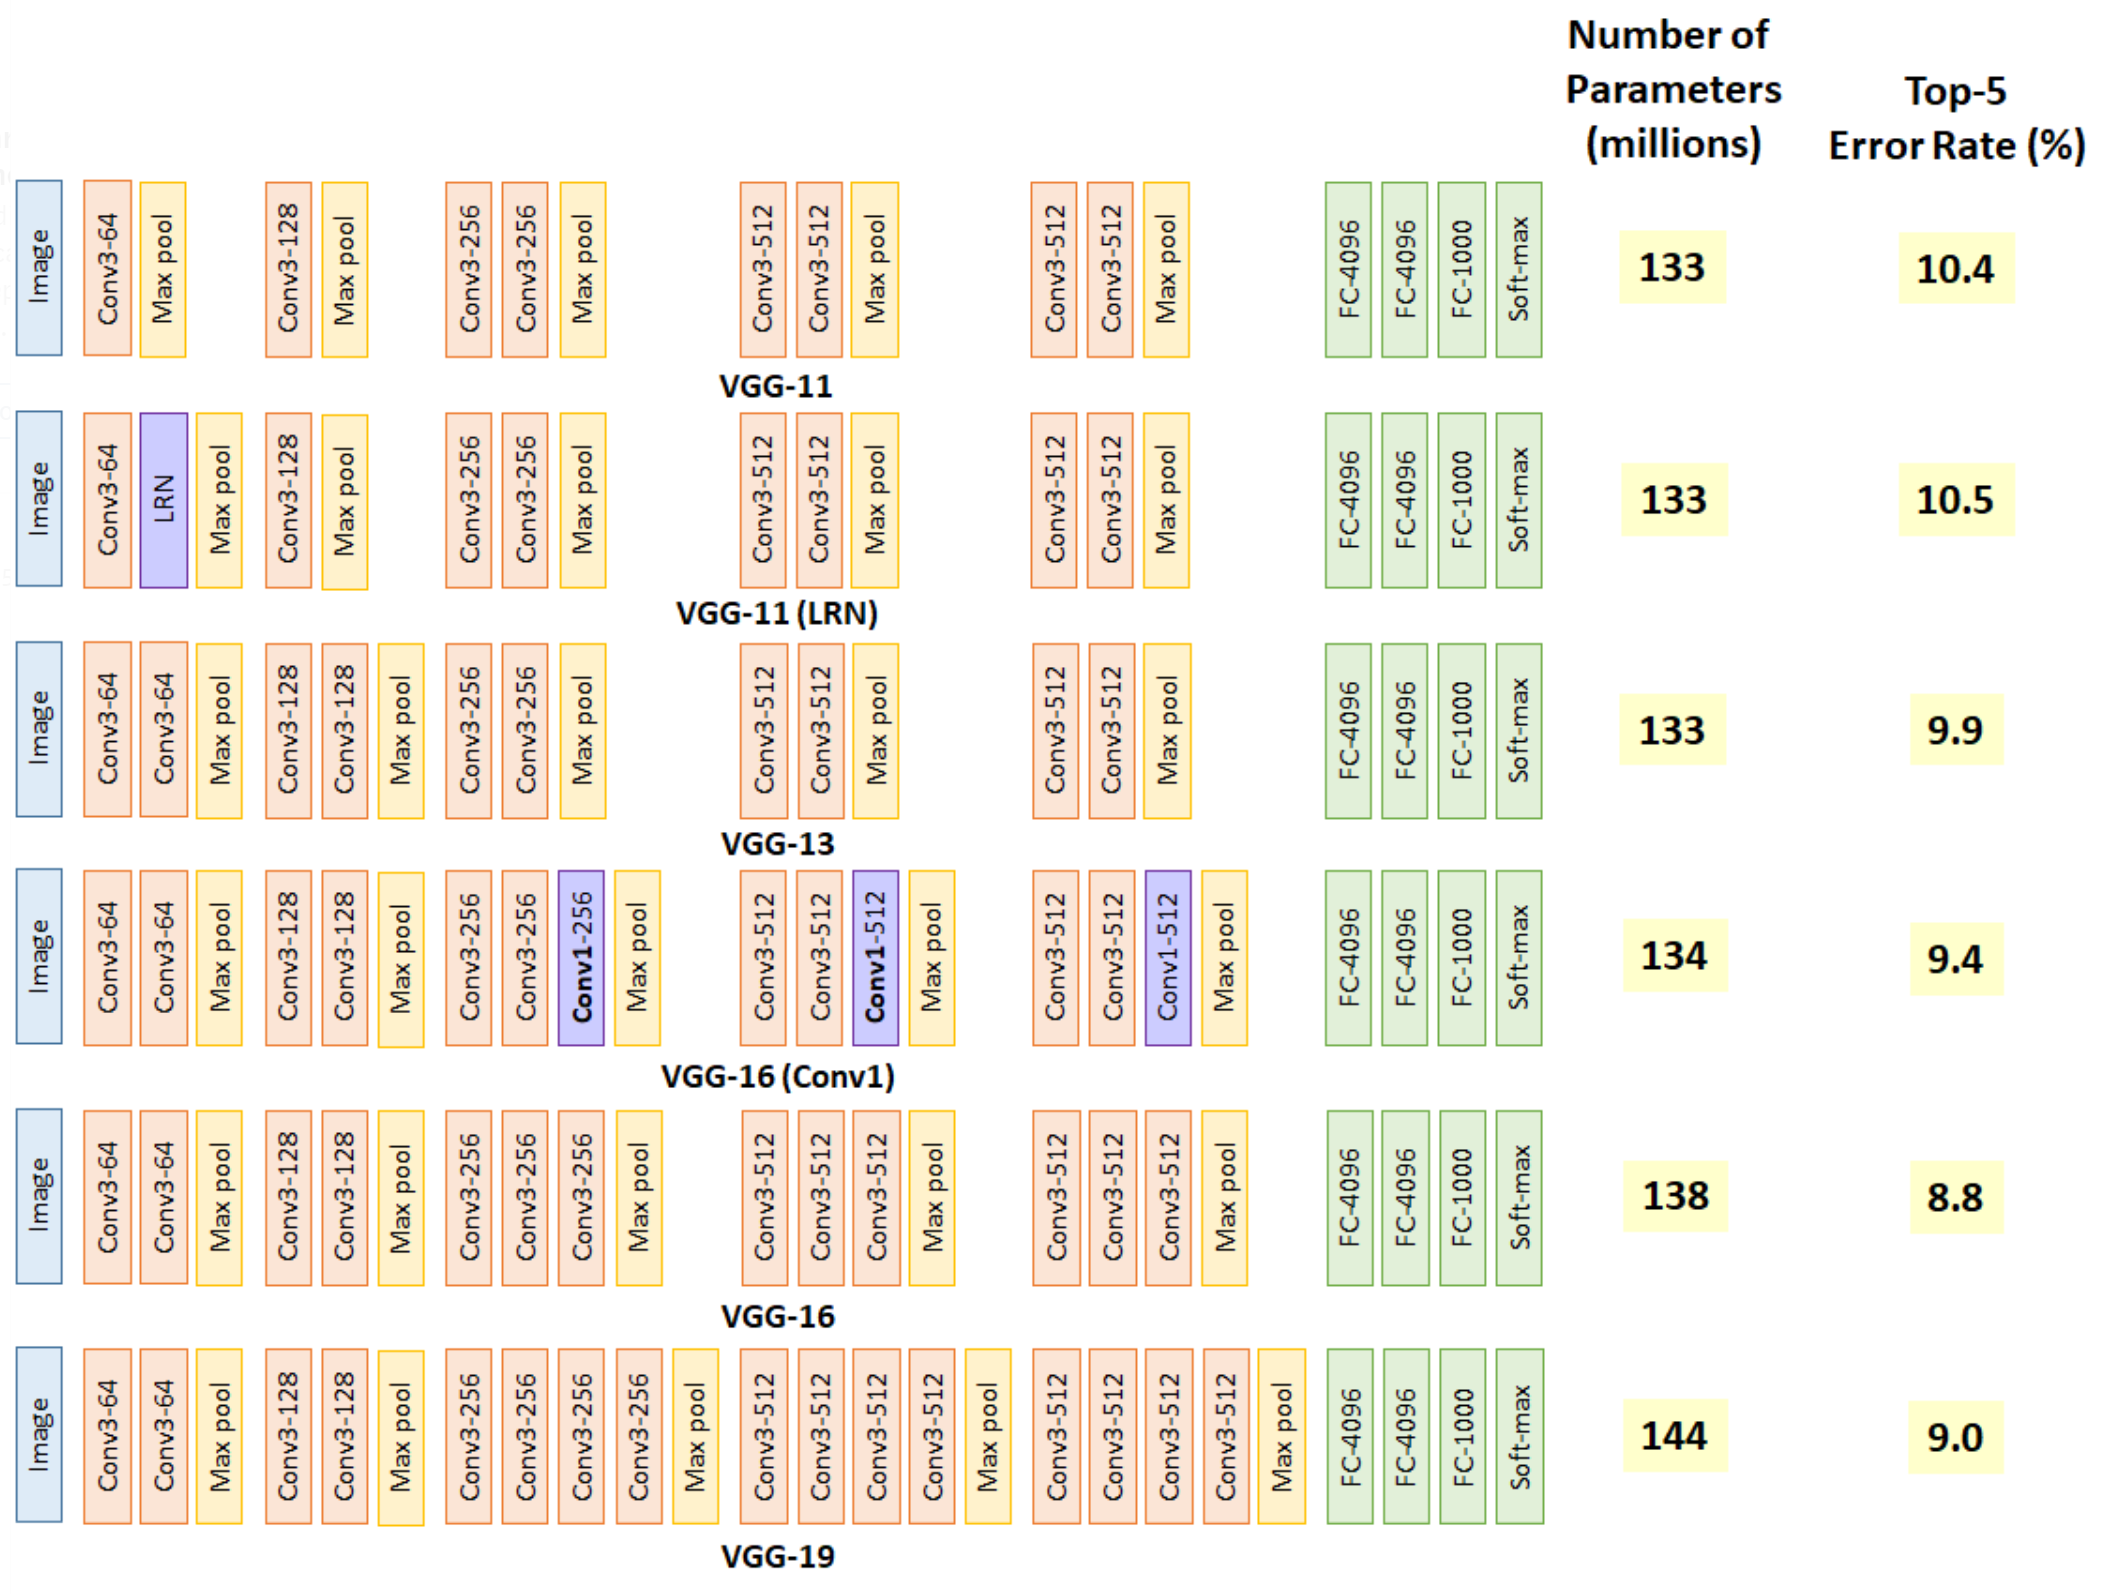

Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049


In [5]:
# VGG16 Architecture: 
display(Image(image_path + 'VGG_all.PNG', width=800, unconfined=True))
print('Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049')

VGG instroduced a model with 6 different CNN architecures that ranges from 11 layers to 25 layers deep. Each of the network consists of 5 blocks of consecutive convolutions paired with a max-pooling layer. The models then finishes it will 3 final dense layers without dropout for traininig. All the convolutional and max-pooling layers are set with a padding to have the "SAME" output size as teh input size. The convolutions will also have a stride of 1 (s = 1) and activated with the ReLU function. 

#### Below shows the VGG-16 model in more detail:

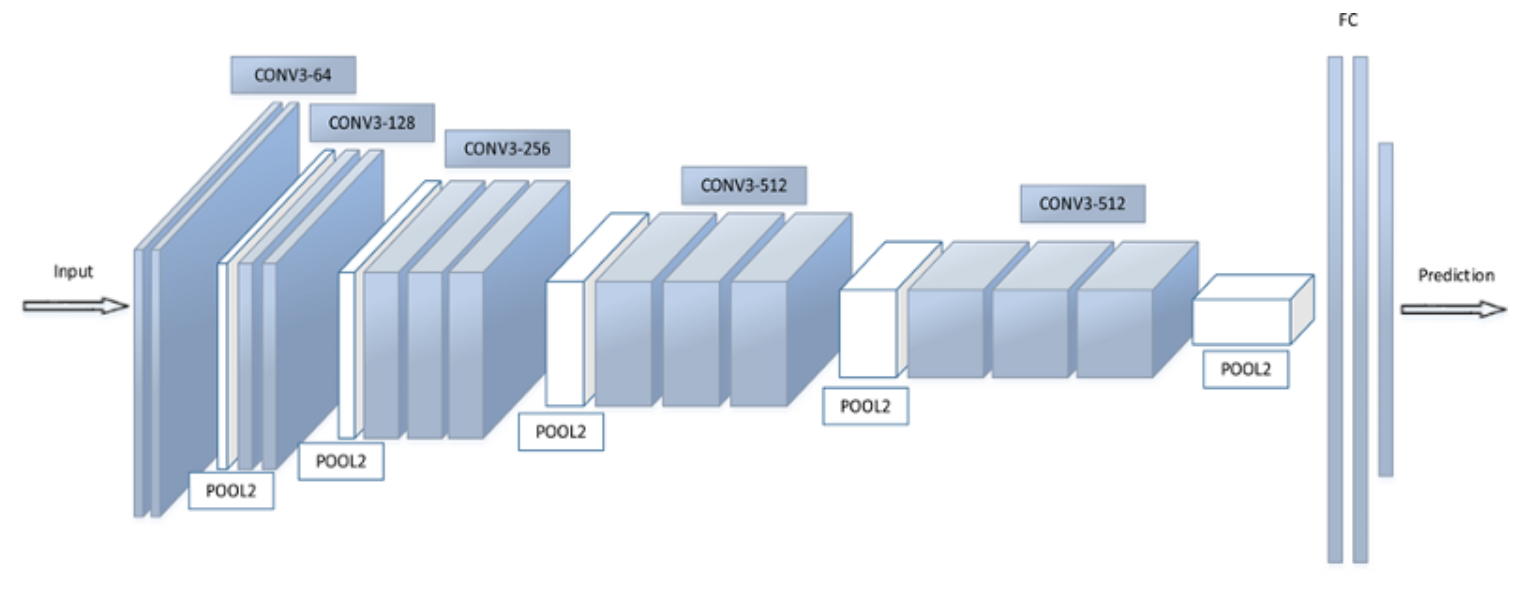

Image ref -> https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl


In [6]:
# VGG16 Architecture: 
display(Image(image_path + 'VGG16 Architecture.PNG', width=800, unconfined=True))
print('Image ref -> https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl')

#### Below shows the VGG-16 beside VGG-19 model in more detail:

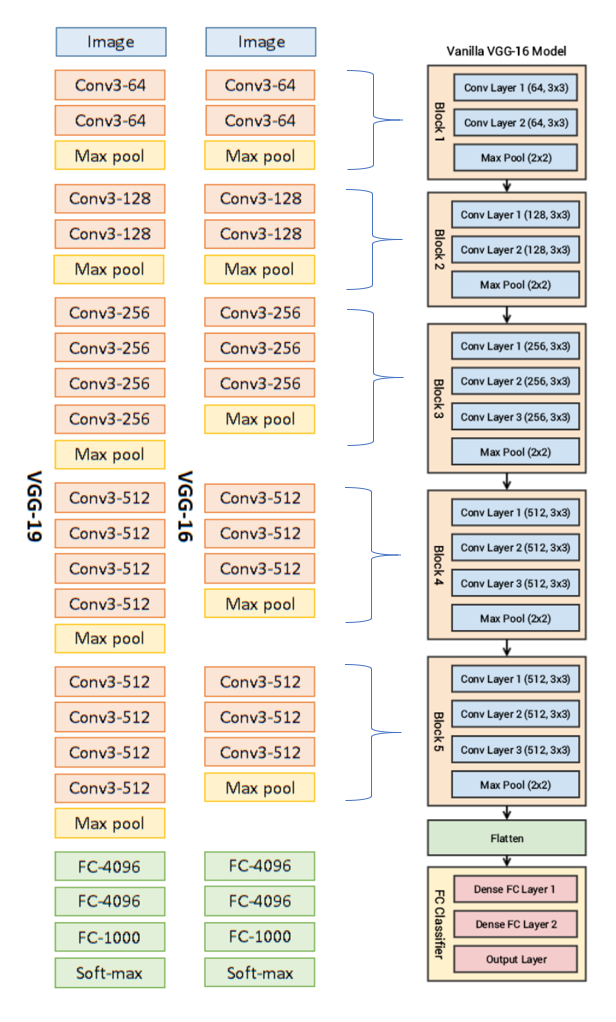

Image ref -> https://hub.packtpub.com/how-to-leverage-transfer-learning-using-pretrained-cnn-models-tutorial/
Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049


In [7]:
# VGG-16 and 19 Architectures: wiiht VGG-16 in more detail.
display(Image(image_path + 'VGG16 and 19 combine.PNG', width=600, unconfined=True))
print('Image ref -> https://hub.packtpub.com/how-to-leverage-transfer-learning-using-pretrained-cnn-models-tutorial/')
print('Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049')

Overall, the VGG-16 and VGG-19 models are considered to be the most performant architectures, where the number 16 and 19 means the depth (how deep the layers goes) of these architectures or the number of trainable layers that were stacked together. __VGG-16__ has a total of 138 million parameters to train for, and consists of 13 convolutional layers paired with 3 dense layers that totals to 16 layers. These arenot inclusive of the 5 max-pooling layers or the 2 dropout layers. Similar can be said for __VGG-19__, where it has 144 million parameters to train for and consists of three more convolutional layers.

## 1.2.1 - Contributions that were introduced by VGG creators:

List of contributions:
1) Substituting larger convolutions with multiple smaller ones. \
2) Increased depth of the feature maps. \
3) Data augmentation and Scale jittering. \
4) Replacement of the fully connnected layers with convolutional ones.

### 1.2.1.1 - Substituting larger convolutions with multiple smaller ones:

It was found through observations by VGG creators that a stack of two 3x3 kernels has the same receptive field as 5x5 kernels. Similarly, a stack of three 3x3 convolutional kernels has the same receptive field as a 7x7 kernel, or a stack of five 3x3 convolutional kernal has the same receptive field as 11x11 kernels. The changes that was implement in VGG networks were swapping for several smaller convolutions to obtain a __larger effective receptive field__. 

The advantages of doing so are:
- It decreases the number of parameters.
- It increases the non-linearity, allowing the network to learn more complex features. 

This essentially allows the model to effectively go deeper. 

### 1.2.1.2 - Increased depth of the feature maps:

The creators also increase the depth of the feature maps by doubling its count for each of the convolutional blocks. This can be seen from the 1st block at 64 to the last blockat 512. For each block, a max-pooling layer with a 2x2 window size and a stride of 2 was also added. This essentially means that the depth was doubled while the spatial dimensions were halved, leading to __more complex and discriminative features__. 

### 1.2.1.3 - Data augmentation and Scale jittering:

Scale jittering is a method where the batched images are randomly scaled, for example from 256 pixels to 512 pixels, and then cropped into the desired input size (like 224x224 pixels). This means that the network will have the opportunity to learn from samples of different scales and be able to classify them. The resulting model would be more robust from training on a larger range of images. Data Augmentation is a method where the dataset would be synthetically increased in size, it includes random transformations, cropping and flipping to create different versions of the same image.

#### The following shows an image that has been augmented in different ways:

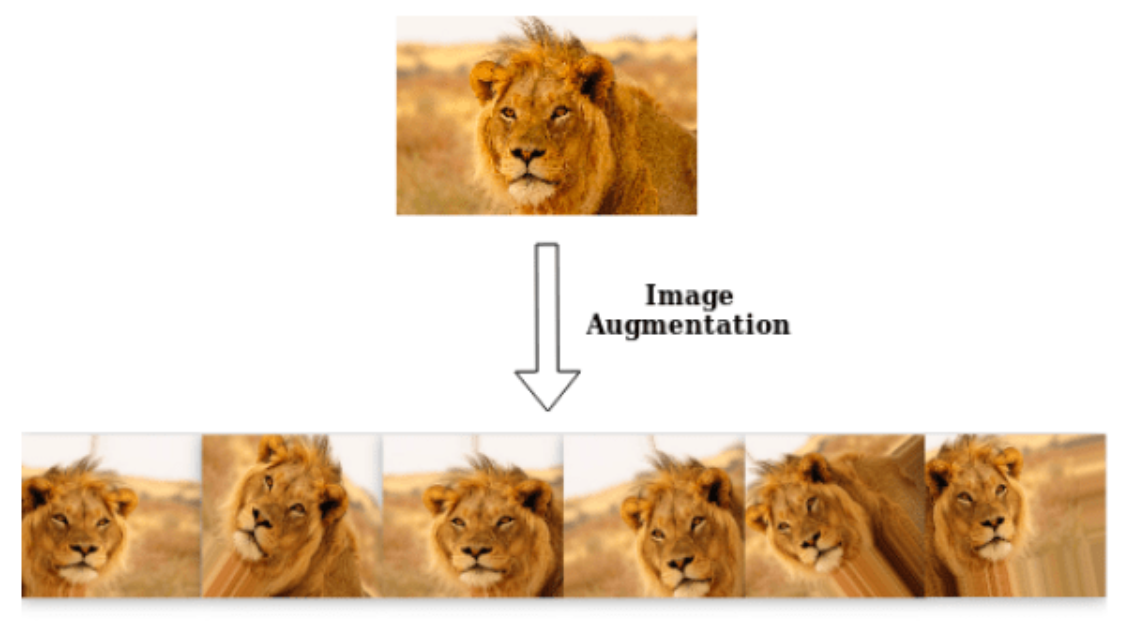

Image ref -> https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22


In [8]:
# Data Augmentation.
display(Image(image_path + 'Data Augmentation.PNG', width=600, unconfined=True))
print('Image ref -> https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22')

### 1.2.1.4 - Replacement of the fully connnected layers with convolutional ones:

This is where the dense layers (fully-connected layers) at the final stages of the model are replaced with convolutional ones. In more detail, the 1st set of convolutions uses larger kernels such as 7x7 and 3x3 kernels to reduce the spatial size of the incoming feature maps to 1x1 (unpadded) and this also increases the depth to 4,096. The previous output layer now uses a 1x1 convolution up to the same number of classes (like N=1,000 of 1x1 convolution for 1,000 classes) resulting in a 1x1xN vector that is normaliised by the softmax function, and then flattend into the final class output predictions. 

Implementing these kinds of layers is called __Fully Convolutional Network (FCN)__

## 1.2.2 - TF and Keras Implementation:

#### For Tensorflow implementation:

There is a repository that is maintained by the TensorFlow contributors and it consists of several curated experimental models. It is also highly advisable to check out the github reposiotry: https://github.com/tensorflow/models

For VGG model, the link is: https://github.com/tensorflow/models/blob/master/research/slim/nets/vgg.py 

#### For Keras API implementation:

The Keras API also offers its own implementations and these can be found in: https://www.tensorflow.org/api_docs/python/tf/keras/applications. Like the official TensorFlow repository, it also maintains most of the models and provides pre-trained parameters. 

__NOTE__: The following shows how to instantiate a VGG network with the Keras API (applications). It loads in the set of persisted parameters that was obtained from the complete training on ImageNet. The instantiated model is therefore able to classify images of the 1,000 classes. This saves a lot of time that would otherwise be used for re-training the model again. However, setting the "weights = None" will essentially reset the model and Keras will initialise it with random weights. If the following parameter is set to "include_top = False", the VGG dense (final fully connected layers) will be excluded and the last layer will output the feature maps. 

In [ ]:
# Instantiate a VGG network:

vgg_net = tf.keras.applications.VGG16(include_top = True,
                                      weights = 'imagenet',
                                      input_tensor = None,
                                      input_shape = None, 
                                      pooling = None,
                                      classes = 1000)

## 1.3 - GoogLeNet and Inception Module/Architecture:

As the name suggests, this model was created by Google and it also introduced the concept of __Inception Blocks__. GoogLeNet can also be called Inception Network. Unlike earlier models that was introduced, GoogLeNet's creators took a different approach to creating this model, where firstly, they considered optimising the CNN computational footprint of their model. This resulted in 12 times reduction in terms of computation complextity than AlexNet and 21 times reduction than VGG-16. This dramatically reduces the training time required for GoogLeNet. Secondly, the creators also focused on making the model both deeper and (more importantly) larger, this meant that the introduction of multiscale processing with blocks of parallel layers. These considerations ultimately resulted in __Inception Modules__, where it is composed of several different layers that are working in parallel.

#### The following shows the diagram for the overall GoogLeNet Architecture:

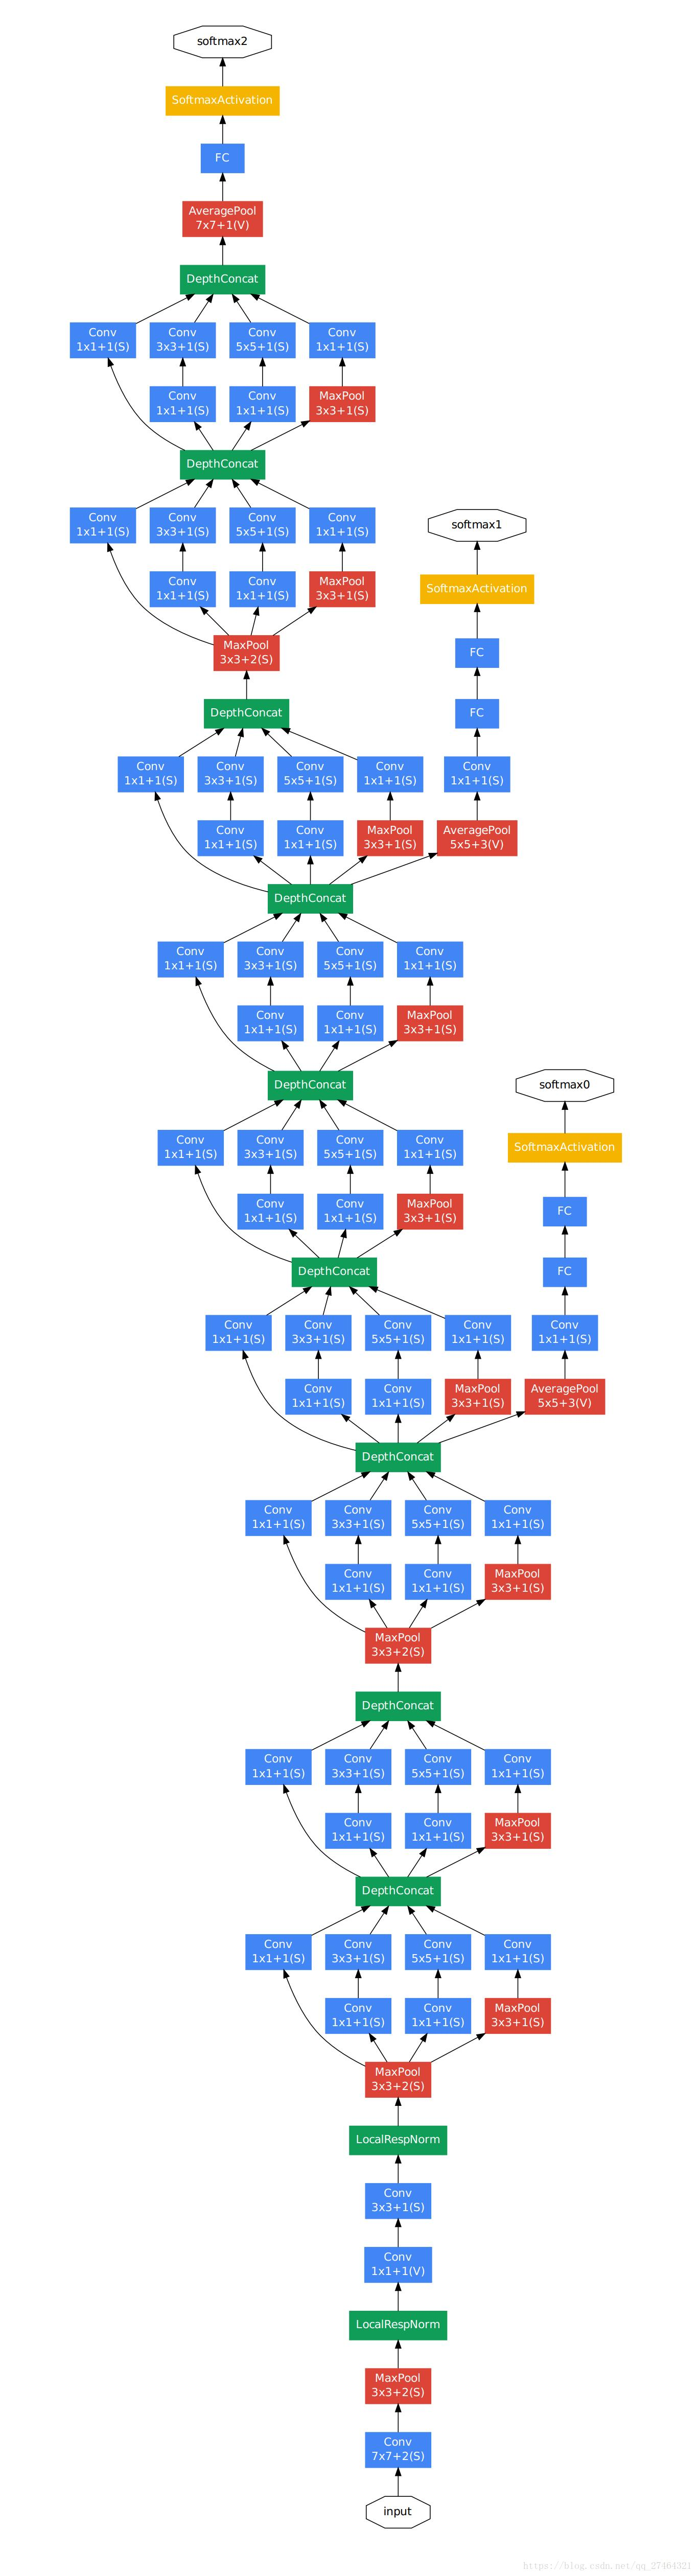

Image ref -> http://www.programmersought.com/article/98042053945/


In [9]:
# GoogLeNet Architecture: 
display(Image(image_path + 'GoogLeNet.PNG', width=800, unconfined=True))
print('Image ref -> http://www.programmersought.com/article/98042053945/')

As it can be seen, begining at the Input, the images will be passing through a series of convolutions and max-pooling layers, then the process flow meets a stack of 9 Inception Modules (a.k.a subnetworks). These blocks of layers can be seen to be stacked both vertically and horizontally. This __Inception Module__ can be seen in more detail below.

#### The following shows the Inception Module:

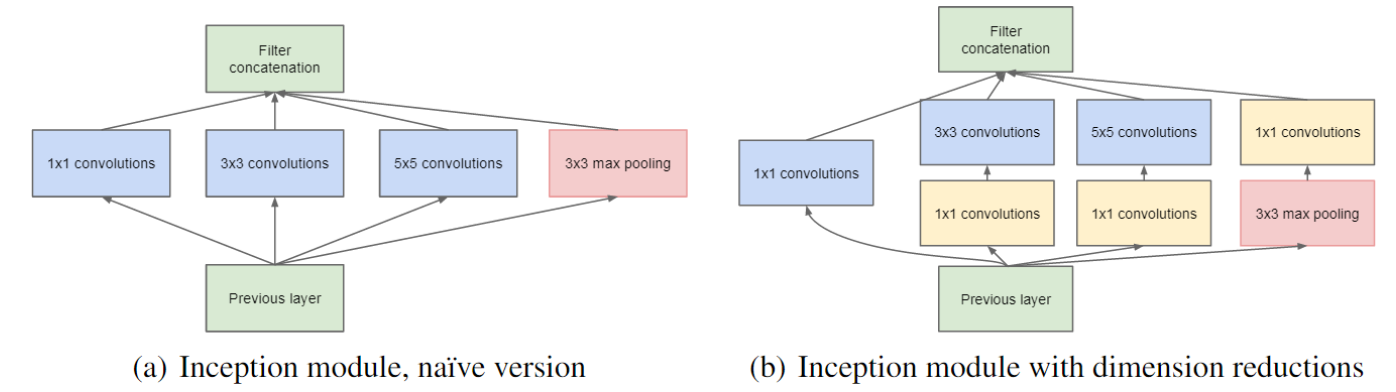

Image ref -> https://www.kdnuggets.com/2017/08/intuitive-guide-deep-network-architectures.html/2


In [11]:
# Inception Module: 
display(Image(image_path + 'Inception Module.PNG', width=1000, unconfined=True))
print('Image ref -> https://www.kdnuggets.com/2017/08/intuitive-guide-deep-network-architectures.html/2')

#### In more detail, taking a look at Image (b), Inception module with dimension reductions:

For each of the module, the input feature maps goes through 4 parallel subblocks that are composed of 1 or 2 different layers. These can be convolutions with different kerne sizes and max-pooling. At the end of each block, the results of these 4 parallel operations are concatenated along that depth dimension, hence producing a single feature volume.

All the convolutional and max-pooling operations will have the padding set to "SAME", the convolutions have a stride = 1 and uses a ReLU activation function.

Taking the example (a) above, the first inception module will receive a feature map of size 28x28x192 as its input, it goes through the following:
- In the first parallel subblock, that is composed of a single 1x1 convolution operation (with N = 64 and a stride of 1) will output a 28x28x64 tensor. 
- At the same time in parallel, the second submodule that is composed of two convolutions (1x1 and 3x3) will output a 28x28x128 tensor. 
- Similarly, the third submodule that is composed of two convolutions (1x1 and 5x5) will output a 28x28x32 tensor. 
- Lastly, the fourth submodule is the max-pooling, that is composed of a max-pooling and a 1x1 convolution operation will output the final 28x28x32 tensor. 
- As mentioned previously, these outputs are then concatenated together forming a 28x28x256 tensor. This tensor is then passed onto the second Inception module down the chain and so on. 

The features of the last module are then average-pooled from a 7x7x1024 tensor to a 1x1x1024 tensor, where it is then densely converted into the required prediction vectors. Note that there are also __Auxiliary branches__ that can be seen in the model, these are used for predictions.

#### The following image will show the depth-wise concatenation (Highlighted in RED) and the resulting outputs from each subblocks:

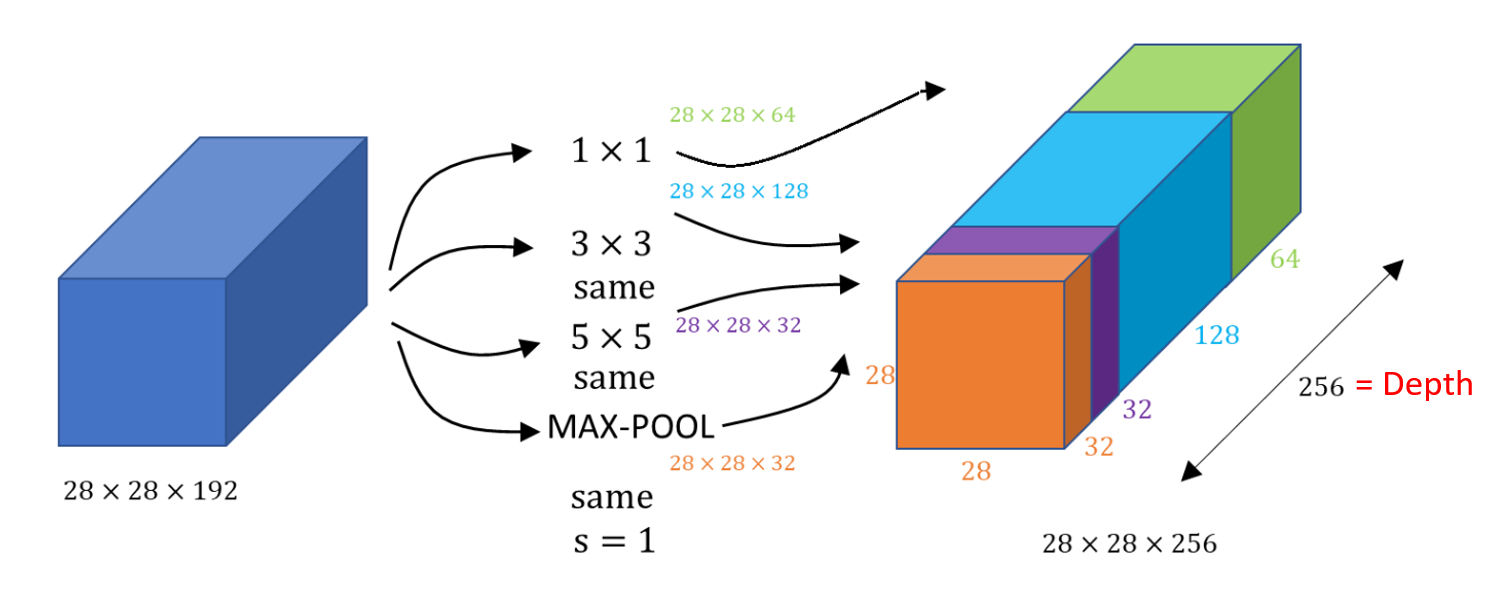

Image ref -> http://datahacker.rs/deep-learning-inception-network/


In [15]:
# Inception - Depth-wise Concatenation: 
display(Image(image_path + 'Inception Module Depth Concat.PNG', width=800, unconfined=True))
print('Image ref -> http://datahacker.rs/deep-learning-inception-network/')

## 1.3.1 - Contributions from Inception Network/GoogLeNet:

List of Contributions:
1) Capturing various details. \
2) Using the 1x1 convolutions as bottlenecks. \
3) Pooling instead of using fully connecting. \
4) Addressing the Vanishing Gradient issue with intermediary losses.

### 1.3.1.1 Capturing various details:


### 1.3.1.2 Using the 1x1 convolutions as bottlenecks:


### 1.3.1.3 Pooling instead of using fully connecting:


### 1.3.1.4 Addressing the Vanishing Gradient issue with intermediary losses:

## 1.3.2 - TF and Keras Implementations: